In [1]:
%load_ext autoreload

In [ ]:
cd ..

In [2]:
%autoreload 2
%aimport src.visualisation

In [3]:
import numpy as np

In [4]:
from astropy.io import fits
from scipy.ndimage import gaussian_filter

In [5]:
from src.sampling.uv_sampling import spider_sampling
from src.operators.measurement import NUFFT_op
from src.solvers import l1_constrained_solver
from src.visualisation import compare
from src.operators.dictionary import wavelet_basis

Failed to import NUDFT_cupy (experimental). Use NUDFT() instead. 


In [6]:
# data + operator

In [24]:
uv = spider_sampling()
m_op = NUFFT_op(uv)

In [26]:
x_true = gaussian_filter(fits.getdata("../data/M51.fits"), 1)

y0 = m_op.dir_op(x_true)
ISNR = 30 #dB
sigma = np.sqrt(np.mean(np.abs(y0)**2)) * 10**(-ISNR/20)
noise = np.random.normal(0, sigma, y0.shape) + 1j * np.random.normal(0, sigma, y0.shape)
y = y0 + noise

x_dirty = m_op.adj_op(y)
noise_val = np.std((m_op.adj_op(noise)))

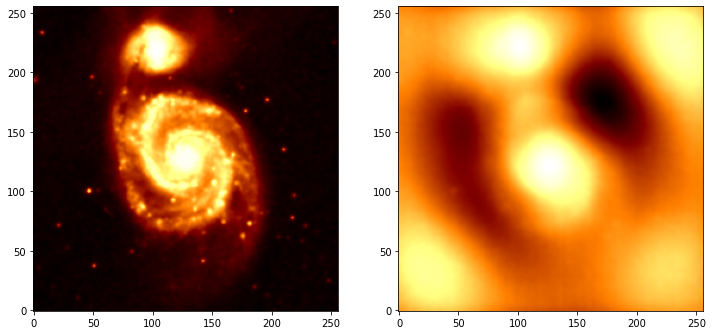

In [27]:
compare([x_true.real, x_dirty.real])

In [28]:
psi = wavelet_basis(x_dirty.shape)

In [32]:
z, diag = l1_constrained_solver(x_dirty, y, noise_val, m_op, psi, 
    beta=1e-2, options={
        'tol': 5e-4, 'iter': 5000, 'update_iter': 50, 
        'record_iters': False, 'positivity': True, 'real': True})

2021-05-17 15:11:59,053 - Optimus Primal - INFO - Starting Power method
2021-05-17 15:11:59,098 - Optimus Primal - INFO - [Power Method] iter = 1, tol = 0.0
2021-05-17 15:11:59,285 - Optimus Primal - INFO - [Power Method] Converged with norm= 5.732309, iter = 11, tol = 0.0009852877
2021-05-17 15:11:59,329 - Optimus Primal - INFO - Running Forward Backward Primal Dual
2021-05-17 15:11:59,418 - Optimus Primal - INFO - [Primal Dual] 0 out of 5000 iterations, tol = 0.630314
2021-05-17 15:12:03,233 - Optimus Primal - INFO - [Primal Dual] 50 out of 5000 iterations, tol = 0.018834
2021-05-17 15:12:07,279 - Optimus Primal - INFO - [Primal Dual] 100 out of 5000 iterations, tol = 0.010233
2021-05-17 15:12:11,307 - Optimus Primal - INFO - [Primal Dual] 150 out of 5000 iterations, tol = 0.003320
2021-05-17 15:12:15,801 - Optimus Primal - INFO - [Primal Dual] 200 out of 5000 iterations, tol = 0.008075
2021-05-17 15:12:20,299 - Optimus Primal - INFO - [Primal Dual] 250 out of 5000 iterations, tol = 

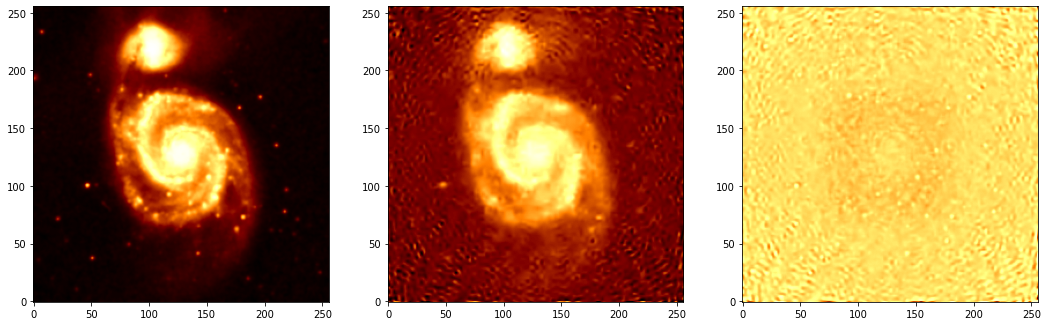

In [33]:
compare([x_true, z.real, x_true-z.real])